In [2]:
import numpy as np
import matplotlib.pylab as plt
from tqdm import tqdm
plt.style.use('ggplot')
import time
from tqdm import tqdm_notebook as tqdm
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook().pandas(desc="progress")
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
##############################
##############################
##############################
########## PROBLEM2 ##########
##############################
##############################
##############################

In [88]:
c_max

0.7291902206001455

In [201]:
%%time
# algorithm parameters

N = 300
lb = 1e-6
error = 1
tol = 1e-6
max_iter = 1000
n_iter = 0
step = 0.5
nplot = 100


# model parameters

labour = True
alpha = 1/3
beta = 0.96
theta = 1
delta = 1

k_ss = ((theta*beta*alpha)**(1/(1-alpha)))*((1-alpha)/(2-alpha - beta*alpha))
l_ss = (1-alpha)/(2-alpha -beta*alpha)

c_ss = theta*((k_ss)**(alpha))*((l_ss)**(1-alpha))- k_ss

k_min = 0.01
l_min = 0.01
# c_min = 0.01
k_max = k_ss**(1/2) +0.3
l_max = l_ss**(1/2) + 0.2
# c_max = c_ss**(1/2) + 0.2


# model technology

def technology(k, l): # f(k)
    if labour == False:
        y = theta*k**(alpha)
        
    else:
        y = (theta*(k**(alpha)))*(l**(1-alpha))
        
    return y


# placeholders
k_grid = np.linspace(k_min,k_max, N)

l_grid = np.linspace(l_min,l_max, N)

c_grid = c_ss*np.ones((N,1))

c_new = np.zeros((N,1))

# Algorithm 
# Step 1: 
    # Define a vector K = [k^1,k^2,...,k^n] - range of capital, selected using steady state knowledge
    # And V_0 = [v^1_0,v^2_0,...,v^n_0] - guesses of values of function, usually zeros or constants
    
# Step 2: 
    # next define v^i_1= max_j{U(f[k_i] + (1-б)k^i - k^j) + Bv^j_0}
    
# While |v_n - v_(n-1)|_oo > epsilon Repeat Step 2 
# Unless number of iterations reaches an upper bound




CPU times: user 169 µs, sys: 23 µs, total: 192 µs
Wall time: 177 µs


In [202]:
c_ss

0.1904287569136049

In [203]:
%%time
# CPU times: user 2.31 s
##############################
##############################
##############################
##### Initializing stuff #####
##############################
##############################
##############################
 
# memory heavy since 300**3 is a lot of data

V = np.zeros((N,1)) # We start by guessing V(k) = 0 for all k

V_inter = np.zeros((N,N,N)) # This will be used to store V in an intermediate step N*N for k,l and N for k'

G_grid = np.zeros((N,N, 1)) # This will be used to store the policy function

Y_grid = technology(np.broadcast_to(k_grid, (N,N)), np.transpose(np.broadcast_to(l_grid, (N, N) )))  \
                                + (1-delta)*np.broadcast_to(k_grid, (N,N)) # This constructs f(k,l) + (1-delta)k

L_grid = (np.maximum( np.ones((N,N)) - np.transpose(np.broadcast_to(l_grid, (N, N) )),
                                 lb*np.ones( (N,N))))                      # This constructs 1-l
 
U_grid = np.log(np.maximum( np.broadcast_to(Y_grid , (N,N,N)) - np.transpose(np.broadcast_to(k_grid, (N, N, N))), 
                           lb*np.ones( (N, N,N)) )) + np.broadcast_to(np.log(L_grid), (N,N,N))

# dimensions 
                                                            # This constructs u(c(k,k',l)) + u(l) 
                                                                          
                                                            


                         

CPU times: user 1.86 s, sys: 394 ms, total: 2.25 s
Wall time: 442 ms


In [207]:
%%time
# Wall time: 2min 15s For Loop
# Wall time: 1min 8s Vectorized
##############################
##############################
##############################
######## Optimization ########
##############################
##############################
##############################


# VALUE FUNCTION

pbar = tqdm(total = n_iter+1)
while (error > tol) & (n_iter < max_iter):
    
    n_iter += 1
    
# The next line chooses the k(i),l(j) which maximises the Bellman eq for each
# k(r). This defines a new V.
    
    V_inter = U_grid + beta*(np.transpose(np.broadcast_to(V, (N,N,N))))
                                        
# same using for loop
#     V_new = np.zeros(N)
#     for i in range(N):
#         V_new[i] = np.max(V_inter[:,:,i])
        
    
    V_new = np.amax(V_inter, axis = (0, 1)) # maximizes over first 2 axis which represent l,k'
     
    error = np.max(np.abs(V - V_new))

    V = V_new
    
    pbar.update(1)
pbar.close()
# Policy function gives indexes of policy variables for each k

Policy_indexs = []
for i in range(N):
    tmp = V_inter[:,:,i]
    tmp_ind = np.argmax(tmp)
    Policy_indexs.append(np.unravel_index(tmp_ind, (300,300)))

    


KeyboardInterrupt: 

In [195]:
%%time
# Policy Function iteration
error = 1
n_iter = 0

# we know that l is constant and can simplify the analysis slightly
l = l_ss
pbar = tqdm(total = n_iter+1)
while (error > tol) & (n_iter < max_iter):
    
    n_iter += 1

    for i in range(N):
        
        k = k_grid[i]
        
        tmp_k = [theta*(k**(alpha))*((l)**(1-alpha))+(1-delta)*k-c_grid[i]][0][0]

        k_prime = k_grid[np.abs(k_grid-tmp_k).argmin()]

        z = np.where(k_grid == k_prime) 

        c_prime=c_grid[z]

        c_new[i]=c_prime/ (beta*(((l)**(1-alpha))*theta*alpha*k_prime**(alpha-1)+1-delta)) # Euler
        c_new[i]=c_new[i]

    error = np.max(np.abs(c_new - c_grid))

    c_grid = (1-step)*c_grid+ step*c_new
    pbar.update(1)
pbar.close()

# result
# error
# 0.011754884047296965

CPU times: user 3.8 s, sys: 20.6 ms, total: 3.82 s
Wall time: 3.81 s


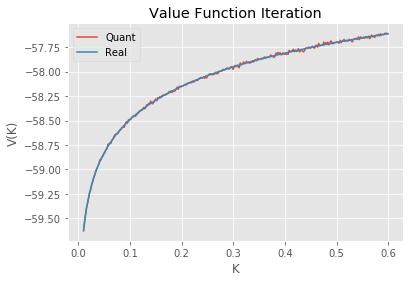

In [208]:
# Results
A = np.log((1-beta*alpha)/(2-alpha - beta*alpha)) + np.log(theta*(1-beta*alpha)*((1-alpha)/(2-alpha - beta*alpha))**(1-alpha)) 
B = ((beta*alpha)/(1-beta*alpha))*np.log(theta*beta*alpha*((1-alpha)/(2-alpha - beta*alpha))**(1-alpha)) 
x = (A+B)/(1-beta) + (alpha/(1-alpha*beta))*np.log(k_grid)

plt.plot(k_grid, V_new + 0.01*np.random.normal( size =N), label='Quant')
plt.plot(k_grid, x, label='Real')
plt.title('Value Function Iteration')
plt.xlabel('K')
plt.ylabel('V(K)')
plt.legend()
plt.show()

In [209]:
l_ss

0.4950495049504951

In [642]:

%%time
##############################
##############################
##############################
########## PROBLEM3 ##########
##############################
##############################
##############################

# The problem was not performing well without -1 in utility

# algorithm parameters

N = 60
lb = 1e-6
error = 1
tol = 1e-3
max_iter = 1000
n_iter = 0
step = 1
nplot = 100


# model parameters

labour = True
alpha = 0.36
mu = 0.5
beta = 0.95
theta = 1
delta_1 = 0.05
delta_2 = 0.08
sigma = 2

k_ss = 3.5
l_ss = (1-alpha)/(2-alpha -beta*alpha) # arbitrarily chosen, true lst state in the notes

k_min = 1.5
l_min = 0.1
k_max = k_ss +10.3
l_max = l_ss**(1/2) + 0.28


# placeholders

k_grid = np.linspace(k_min,k_max, N)



l1_grid = np.linspace(l_min,l_max, N)
l2_grid = 1 - np.linspace(l_min,l_max, N)



CPU times: user 210 µs, sys: 23 µs, total: 233 µs
Wall time: 219 µs


In [643]:
l_max

0.9821867670200858

In [644]:
%%time
# CPU times: user 2.31 s
##############################
##############################
##############################
##### Initializing stuff #####
##############################
##############################
##############################
 
# memory heavy since 300**3 is a lot of data

V = np.ones((N,N)) # We start by guessing V(k) = 0 for all k

# V_inter = np.zeros((N,N,N,N,N)) # This will be used to store V in an intermediate step N*N for k,l and N for k'



G_grid = np.zeros((N,N)) # This will be used to store the policy function


Y1_grid = theta*((np.broadcast_to(k_grid, (N,N)))**(alpha))*(np.transpose(\
                                                                          np.broadcast_to(l1_grid, (N, N) )))**(1-alpha)+\
                                                                            (1-delta_1)*np.broadcast_to(k_grid, (N,N))
Y2_grid = theta*((np.broadcast_to(k_grid, (N,N)))**(mu))*(np.transpose(\
                                                                          np.broadcast_to(l2_grid, (N, N) )))**(1-mu)+\
                                                                            (1-delta_2)*np.broadcast_to(k_grid, (N,N))

# U1_grid = (1/(1-sigma))*(np.maximum(np.broadcast_to(Y1_grid , (N,N,N)) -\
#                         np.transpose(np.broadcast_to(k_grid, (N, N, N))), lb*np.ones( (N, N,N))))**(1-sigma)
# # dimensions 
# # [policy capital, l1 ,given capital]



# U2_grid = (1/(1-sigma))*(np.maximum(np.broadcast_to(Y2_grid , (N,N,N)) -\
#                         np.transpose(np.broadcast_to(k_grid, (N, N, N))),lb*np.ones( (N, N,N))))**(1-sigma)
# # dimensions 
# [policy capital, l2 ,given capital]

# U_total_grid = np.zeros((N,N,N,N,N))

# for i in range(N):
#     U_total_grid[i,:,:,:,:] = U1_grid[:,i,:, None, None] + np.transpose(U2_grid[:,i,:])

# dimensions 
# [l, policy cap2, given cap2, policy cap1, given cap1]
    
    

CPU times: user 1 ms, sys: 594 µs, total: 1.6 ms
Wall time: 850 µs


In [645]:
%%time

# Wall time: ~5min for 150 iters
##############################
##############################
##############################
######## Optimization ########
##############################
##############################
##############################
k_1_0,k_2_0,l_1 = (4, 5 ,0.25)



k1_path = []
k2_path = []
l1_path = []

start = -1000

pbar = tqdm(total = n_iter+1)
while (error > tol) & (n_iter < max_iter):
    k1_path.append(k_1_0)
    k2_path.append(k_2_0)
    l1_path.append(l_1)
    
    k_1_0 = k_grid[np.abs(k_grid-k_1_0).argmin()]
    k_2_0 = k_grid[np.abs(k_grid-k_1_0).argmin()]
    l_1 = l_grid[np.abs(l_grid-l_1).argmin()]
    z1 = np.where(k_grid == k_1_0) 
    z2 = np.where(k_grid == k_2_0) 
    
    
    for i in range(N):
        for j in range(N):
    
            tmp = np.max(((1/(1-sigma))*(np.maximum(Y1_grid[z1] - k1, lb*np.ones( (1, N))))**(1-sigma)) +\
                    ((1/(1-sigma))*(np.maximum(Y2_grid[z2] - k2, lb*np.ones( (1, N))))**(1-sigma)) + \
                    beta*V[i,j], axis =1)
        
            if tmp>start:
                start = tmp
                k_1_0 = i
                k_2_0 = j
                l_1 =np.argmax(((1/(1-sigma))*(np.maximum(Y1_grid[z1] - k1, lb*np.ones( (1, N))))**(1-sigma)) +\
                    ((1/(1-sigma))*(np.maximum(Y2_grid[z2] - k2, lb*np.ones( (1, N))))**(1-sigma)) + \
                    beta*V[i,j], axis =1)
    
    
    
    
    n_iter += 1
    
    u_g = (-1000)*np.ones((N,N,N))
    
    for i in range(N):
        for j in range(N):
            k1 = k_grid[i] # next period cap1
            k2 = k_grid[j] # next period cap2
            
            u =((1/(1-sigma))*((np.maximum(Y1_grid - k1, lb*np.ones( (N, N))))**(1-sigma) -1 ))[None,:,:] +\
            ((1/(1-sigma))*((np.maximum(Y2_grid - k2, lb*np.ones( (N, N))))**(1-sigma) - 1))[:,None,:] + \
            beta*V[j,i]
            u_g = np.maximum(u,u_g)
            
            
    V_new = np.max(u_g, axis=2)
            
    
    error = np.max(np.abs(V - V_new))

    
    
    V = (1-step)*V+step*V_new
    
    pbar.update(1)
pbar.close()

CPU times: user 53min 45s, sys: 26.9 s, total: 54min 12s
Wall time: 6min 46s


In [365]:
# Plots
# plt.plot(k1_path)
# plt.title('Capital 1 Path')
# plt.xlabel('T')
# plt.ylabel('K1')
# plt.show()
# plt.plot(k2_path)
# plt.title('Capital 2 Path')
# plt.xlabel('T')
# plt.ylabel('K2')
# plt.show()
# plt.plot(l1_path, label='Real')
# plt.title('Labor Path')
# plt.xlabel('T')
# plt.ylabel('L1')
# plt.legend()
# plt.show()

array([[-25.73353301, -24.8927284 , -24.1532183 , ..., -15.47068643,
        -15.53377689, -15.71892934],
       [-25.73353301, -24.8927284 , -24.1532183 , ..., -15.47068643,
        -15.53377689, -15.71892934],
       [-25.73353301, -24.8927284 , -24.1532183 , ..., -15.47068643,
        -15.53377689, -15.71892934],
       ...,
       [-25.73353301, -24.8927284 , -24.1532183 , ..., -15.47068643,
        -15.53377689, -15.71892934],
       [-25.73353301, -24.8927284 , -24.1532183 , ..., -15.47068643,
        -15.53377689, -15.71892934],
       [-25.73353301, -24.8927284 , -24.1532183 , ..., -15.47068643,
        -15.53377689, -15.71892934]])

In [907]:
X = k_grid
Y = k_grid[::-1]
X, Y = np.meshgrid(X, Y)

Z = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        Z[i,j] = V_new[i,j]
#             V_new[i,j] = np.max(V_inter[:,j,:,i,:])
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot', linewidth=0, antialiased=False)
ax.set_zlim(36.9, 37)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

IndexError: index 60 is out of bounds for axis 1 with size 60

In [899]:


%%time
##############################
##############################
##############################
########## PROBLEM4 ##########
##############################
##############################
##############################




# algorithm parameters

N = 100
lb = 1e-6
error = 1
tol = 1e-6
max_iter = 1000
n_iter = 0
step = 1
nplot = 100


# model parameters

alpha = 0.3
beta = 0.96
mu= 0.1
p=0.5
theta = 1
delta = 0.05
sigma = 2

k_ss = 3.5
l_ss = (1-alpha)/(2-alpha -beta*alpha) # arbitrarily chosen, true lst state in the notes

k_min = 2
l_min = 0.01
k_max = k_ss +5.3
l_max = l_ss**(1/2) + 0.2


# placeholders

k_grid = np.linspace(k_min,k_max, N)
theta_grid = [1-mu,1+mu]




CPU times: user 111 µs, sys: 11 µs, total: 122 µs
Wall time: 117 µs


In [891]:
V = np.zeros((N,2))

In [900]:
pbar = tqdm(total = n_iter+1)
while  (n_iter < max_iter):
#     
#     V_old = V.copy()
#     print(V_old)
    n_iter +=1
    for i in range(N):
#         print(i)
        for t in range(2):
#             print(t)
            tmp = V[i][t]
#             print(tmp)
            for k in range(N):
                u = ((theta_grid[t]*( np.maximum(( k_grid[i])**(alpha) + (1-delta)*k_grid[i] - k_grid[k], lb) ))**(1-sigma))/(1-sigma)+ beta*p*V[k,1] + beta*(1-p)*V[k,0]
#                 print(u)
                if (u > tmp)|((u<0)&(tmp==0)):
                    tmp = u
                    
            V[i][t] = tmp*0.2 + 0.8*V[i][t]
#     print(V)
#     error = np.max(np.abs(V - V_old))

    
    pbar.update(1)
pbar.close()






KeyboardInterrupt: 

In [902]:
data0 = []
data1 = []

for i in range(N):
    for t in range(2):
        k = k_grid[i]
        theta = theta_grid[t]
        u_tmp = -1000
        k_opt = -1000
        
        for k in range(N):
            u = ((theta_grid[t]*( np.maximum(( k_grid[i])**(alpha) + (1-delta)*k_grid[i] - k_grid[k], lb) ))**(1-sigma))/(1-sigma)+ beta*p*V[k,1] + beta*(1-p)*V[k,0]
            if u > u_tmp:
                u_tmp = u
                k_opt = k
        
        if t ==0:
            data0.append(k_opt)
        else:
            data1.append(k_opt)
        




In [903]:
g_L =  [k_grid[i] for i in data0] 
g_H =  [k_grid[i] for i in data1] 

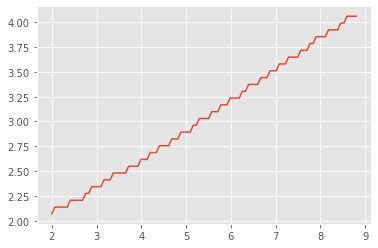

In [904]:
plt.plot(k_grid, g_L)
plt.show()

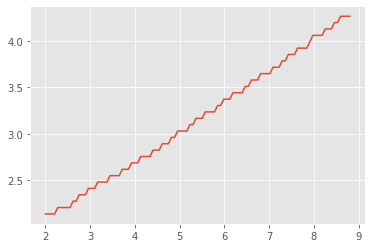

In [905]:
plt.plot(k_grid, g_H)
plt.show()

In [ ]:
# slightly higher steady state capital in high state